# Classification of MRI images using CNN for tumour detection
## (Part 2 - Analysis of the training and validation)

### Comparision of training and validation loss and accuracy
Let us load the training history of the different models using Pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

basic_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/basic.csv")
res_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/res.csv")
vgg_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/vgg.csv")
mobile_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/mobile.csv")
inception_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/inception.csv")
alexnet_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/alexnet.csv")
lenet_df = pd.read_csv("/content/drive/MyDrive/mri-cnn/lenet.csv")

### Model 1 - Basic CNN
#### Training Loss vs Accuracy

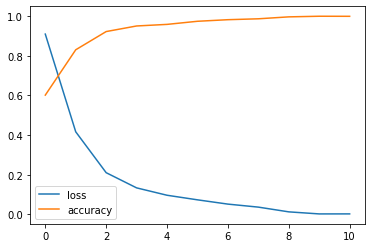

In [3]:
basic_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

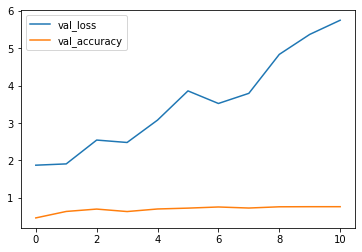

In [4]:
basic_df[["val_loss","val_accuracy"]].plot()

### Model 2 - ResNet50
#### Training Loss vs Accuracy

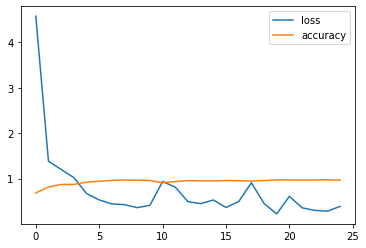

In [5]:
res_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

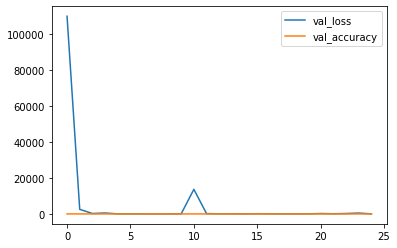

In [6]:
res_df[["val_loss","val_accuracy"]].plot()

### Model 3 - VGG16
#### Training Loss vs Accuracy

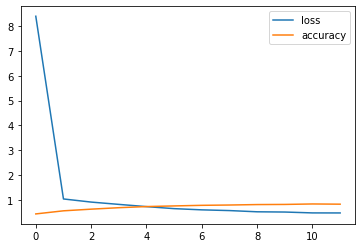

In [7]:
vgg_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

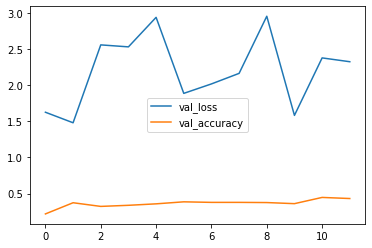

In [8]:
vgg_df[["val_loss","val_accuracy"]].plot()

### Model 4 - MobileNet
#### Training Loss vs Accuracy

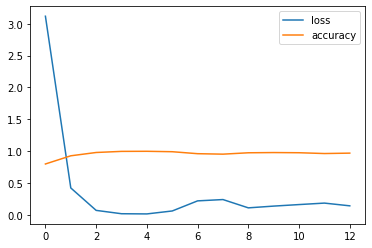

In [9]:
mobile_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

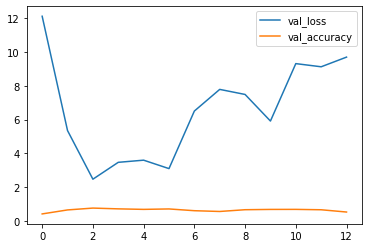

In [10]:
mobile_df[["val_loss","val_accuracy"]].plot()

### Model 5 - InceptionNet v2
#### Training Loss vs Accuracy

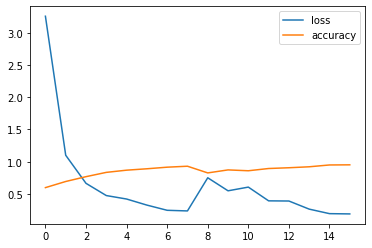

In [11]:
inception_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

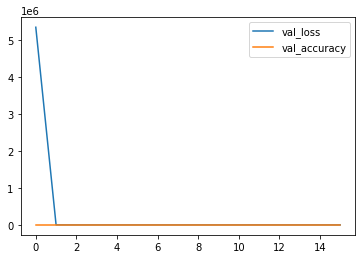

In [12]:
inception_df[["val_loss","val_accuracy"]].plot()

### Model 6 - AlexNet
#### Training Loss vs Accuracy

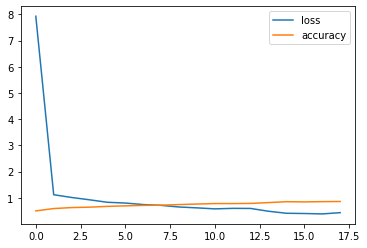

In [13]:
alexnet_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

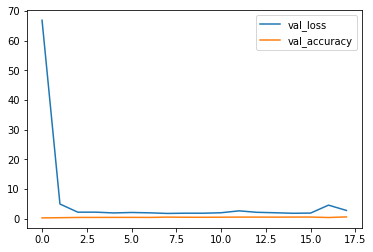

In [14]:
alexnet_df[["val_loss","val_accuracy"]].plot()

### Model 7 - LeNet
#### Training Loss vs Accuracy

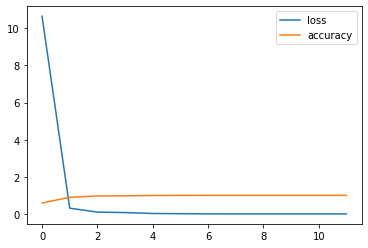

In [15]:
lenet_df[["loss","accuracy"]].plot()

#### Validation loss vs accuracy

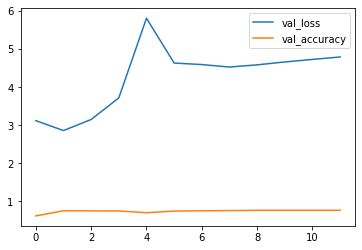

In [16]:
lenet_df[["val_loss","val_accuracy"]].plot()

## Comparisions across different models

Merge the training histories of the different models into a single DataFrame object.

In [17]:
result = basic_df.merge(res_df, on=['Unnamed: 0'], suffixes=('_basic', '_resnet'), how='outer')
result = result.merge(vgg_df, on=['Unnamed: 0'], how='outer')
result = result.merge(mobile_df, on=['Unnamed: 0'], suffixes=('_vgg', '_mobile'), how='outer')
result = result.merge(inception_df, on=['Unnamed: 0'], how='outer')
result = result.merge(alexnet_df, on=['Unnamed: 0'], suffixes=('_inception', '_alexnet'), how='outer')
result = result.merge(lenet_df, on=['Unnamed: 0'], how='outer')
result = result.rename(columns={"loss": "loss_lenet", "accuracy": "accuracy_lenet", "val_loss": "val_loss_lenet", "val_accuracy": "val_accuracy_lenet"})
result = result.drop(["Unnamed: 0"],axis=1)
result.head()

,loss_basic,accuracy_basic,val_loss_basic,val_accuracy_basic,loss_resnet,accuracy_resnet,val_loss_resnet,val_accuracy_resnet,loss_vgg,accuracy_vgg,...,val_loss_inception,val_accuracy_inception,loss_alexnet,accuracy_alexnet,val_loss_alexnet,val_accuracy_alexnet,loss_lenet,accuracy_lenet,val_loss_lenet,val_accuracy_lenet
0,0.909815,0.601742,1.874657,0.467005,4.573378,0.683624,109816.406250,0.314721,8.403346,0.425087,...,5.355884e+06,0.274112,7.926887,0.501394,66.840019,0.263959,10.654166,0.594077,3.118296,0.621827
1,0.416476,0.830662,1.909255,0.639594,1.380134,0.814634,2539.021240,0.324873,1.028796,0.550174,...,9.116817e+02,0.284264,1.118451,0.590941,4.941146,0.335025,0.309578,0.893380,2.857910,0.756345
2,0.210071,0.922648,2.545598,0.703046,1.201429,0.870383,229.150101,0.360406,0.902896,0.617073,...,1.396768e+00,0.560914,1.013674,0.628223,2.192299,0.423858,0.097243,0.970383,3.148045,0.753807
3,0.133404,0.950871,2.481070,0.637056,1.021851,0.871429,497.202545,0.446701,0.809729,0.675958,...,1.403625e+00,0.535533,0.924852,0.644251,2.205680,0.431472,0.073109,0.973519,3.713698,0.751269
4,0.096139,0.958885,3.078835,0.705584,0.672167,0.920557,27.825642,0.494924,0.719362,0.721951,...,1.547001e+00,0.598985,0.830261,0.673519,1.940513,0.444162,0.022919,0.994425,5.801144,0.705584


### Comparision of Training loss

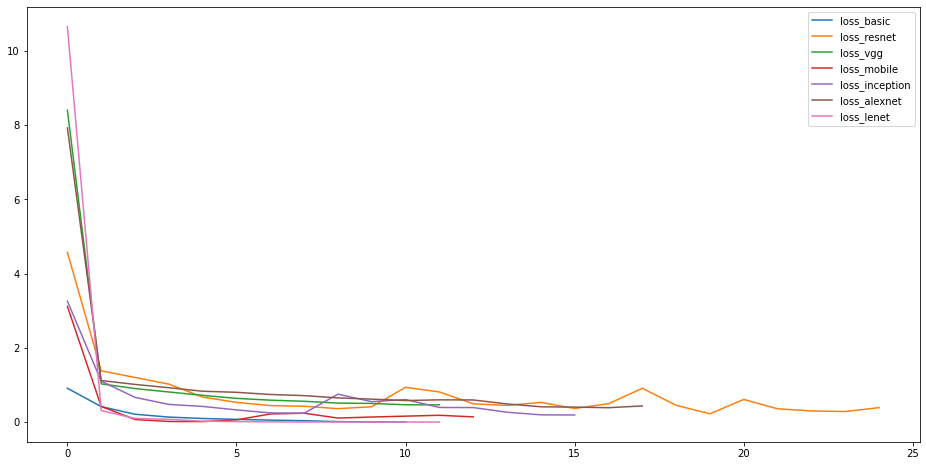

In [18]:
result[["loss_basic","loss_resnet","loss_vgg","loss_mobile","loss_inception","loss_alexnet","loss_lenet",]].plot(figsize=(16,8))

### Comparision of Training accuracy

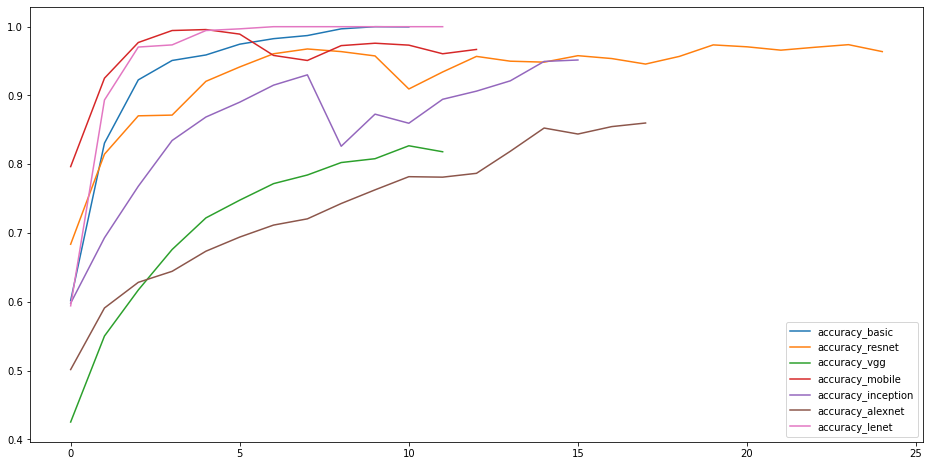

In [19]:
result[["accuracy_basic","accuracy_resnet","accuracy_vgg","accuracy_mobile","accuracy_inception","accuracy_alexnet","accuracy_lenet",]].plot(figsize=(16,8))

### Comparision of Validation loss

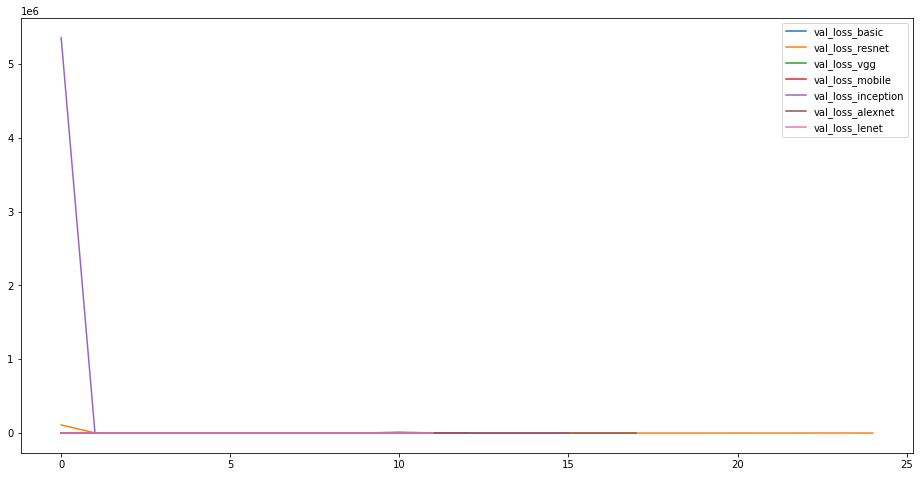

In [20]:
result[["val_loss_basic","val_loss_resnet","val_loss_vgg","val_loss_mobile","val_loss_inception","val_loss_alexnet","val_loss_lenet",]].plot(figsize=(16,8))

### Comparision of Validation accuracy

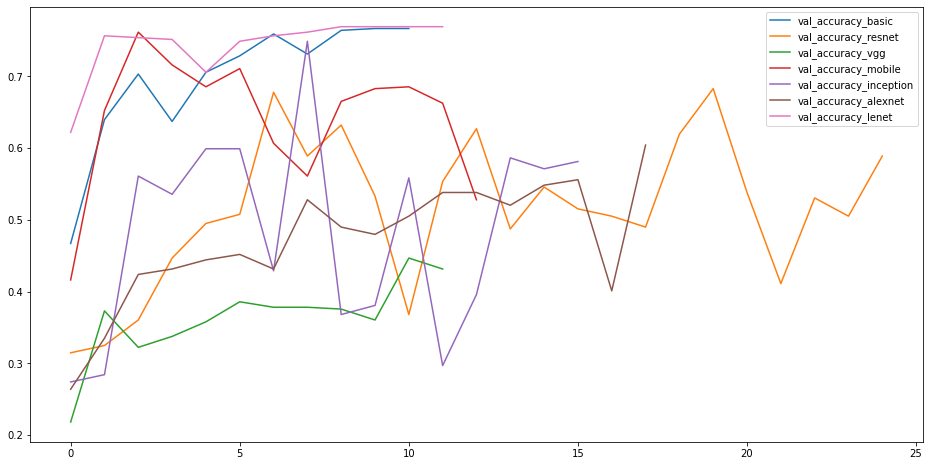

In [21]:
result[["val_accuracy_basic","val_accuracy_resnet","val_accuracy_vgg","val_accuracy_mobile","val_accuracy_inception","val_accuracy_alexnet","val_accuracy_lenet",]].plot(figsize=(16,8))

## Conclusion

We see that Basic CNN, LeNet, MobileNet and InceptionNet show high accuracy during the training. Also, ResNet and VGG shows moderate accuracy. However, AlexNet has the worst performance in the training accuracy metric.

However, this observation does not materialize when looking at the validation accuracy. While MobileNet and InceptionNet has shown very high performance in some epochs, the performances are not stable. VGG and AlexNet has shown the worst performance during the validation tests. ResNet has shown moderate performance in some epochs, while the performance has degraded in some other epochs. The best and stable performance are shown by Basic CNN and LeNet during the validation tests.

We can conclude that simpler models like Basic CNN and LeNet are more able to fit the data properly. The larger complcated models (AlexNet, for example) does not perform well in the experiment because the dataset does not have enough variety for the model to train properly, i.e. the model underfitted the data.

Hence, we can try tuning the parameters of a simpler model to achieve higher performance in the dataset.